# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear 非線性

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [4]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

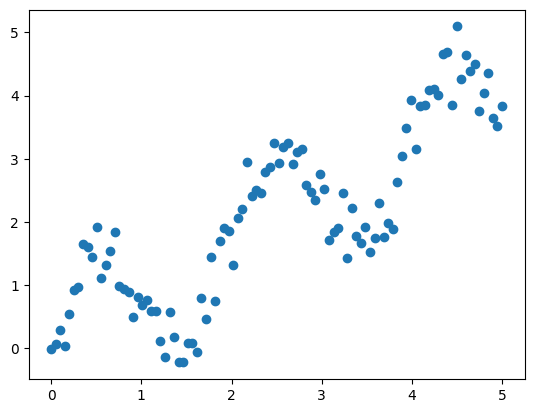

In [6]:
plt.scatter(x,y)
plt.show()

#### nonlinear

In [10]:
regr_lin = LinearRegression()

In [12]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [14]:
regr_lin.fit(X,y)

LinearRegression()

0.6092789124121848


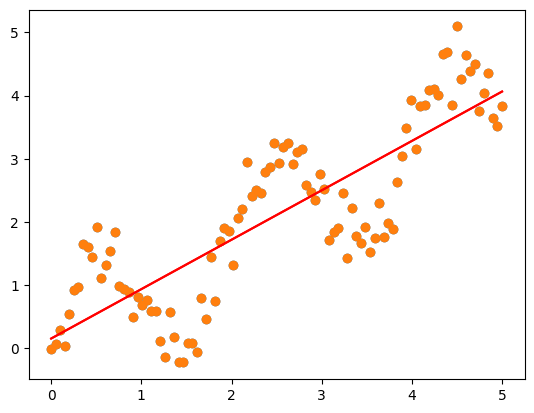

In [18]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)
plt.show()

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [20]:
print(x.shape)

(100,)


In [22]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [24]:
regr_poly = LinearRegression()

In [26]:
regr_poly.fit(X_poly, y)

LinearRegression()

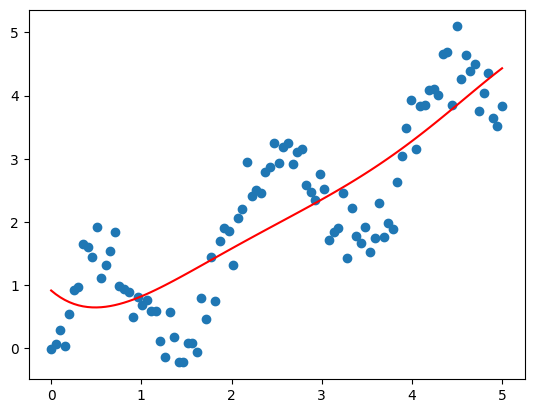

In [28]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')
plt.show()

In [32]:
print('Coefficients: ', regr_poly.coef_)  #5個斜率，對應公式的w
print('interception: ', regr_poly.intercept_) #1個截距，對應公式的b

Coefficients:  [-1.22958866  1.68740905 -0.66493591  0.12228404 -0.00826468]
interception:  0.9116415763070167


In [44]:
W=regr_poly.coef_
b=regr_poly.intercept_
Y_train = np.dot(X_poly,W.T)+b  #X_poly是(100x5)的矩陣，而W是(1X5)的一維陣列，所以要將W轉成(5X1)才能相乘
Y_train

array([0.91164158, 0.85376045, 0.80398476, 0.76182878, 0.72682522,
       0.69852491, 0.67649647, 0.66032598, 0.64961668, 0.64398859,
       0.64307824, 0.64653833, 0.65403738, 0.66525942, 0.67990367,
       0.69768421, 0.71832965, 0.7415828 , 0.76720037, 0.7949526 ,
       0.82462298, 0.85600788, 0.88891628, 0.92316937, 0.95860031,
       0.99505382, 1.03238591, 1.07046355, 1.10916431, 1.14837606,
       1.18799666, 1.22793359, 1.26810366, 1.30843266, 1.34885507,
       1.38931368, 1.42975933, 1.47015051, 1.5104531 , 1.55064001,
       1.59069085, 1.63059164, 1.67033443, 1.70991703, 1.74934263,
       1.78861953, 1.82776075, 1.86678378, 1.90571019, 1.94456533,
       1.983378  , 2.02218013, 2.06100646, 2.09989419, 2.13888267,
       2.17801308, 2.21732808, 2.25687153, 2.2966881 , 2.33682301,
       2.37732165, 2.41822929, 2.45959074, 2.50145002, 2.54385004,
       2.58683227, 2.63043643, 2.67470015, 2.71965862, 2.76534434,
       2.81178669, 2.85901169, 2.90704163, 2.95589477, 3.00558

In [46]:
regr_poly.predict(X_poly)
mse = np.sum((Y_train-y)**2) / len(y)
print(mse)

0.5680890881599087


#### RBF 常態分布

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [49]:
# normal distrubution 定義公式
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [53]:
sigma = 0.3

In [55]:
# 增加維度
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x]) 



In [57]:
regr_rbf = LinearRegression()

In [59]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

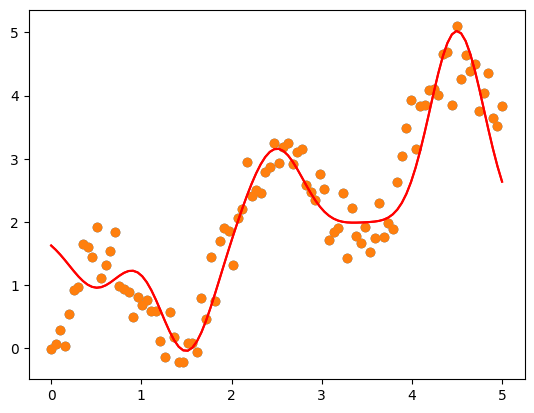

In [63]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')
plt.show()

In [65]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.88036649 -1.89195842  1.32135607  0.13269778  3.18010684]
interception:  1.8433679222431114


#### Comparison

In [69]:
# 比較三種方式的預測結果
Y_lin = regr_lin.predict(X) #線性
Y_poly = regr_poly.predict(X_poly) #多項式
Y_rbf = regr_rbf.predict(X_rbf) #常態分布

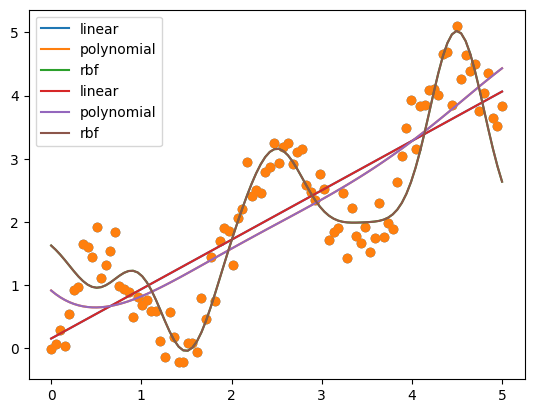

In [73]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()
plt.show()

## 請計算模型的MSE

In [75]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6092789124121848


In [77]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5680890881599087


In [79]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.28264439561678717
